In [2]:
import io
import matplotlib.pyplot as plt
import pandas
import scipy
import seaborn
import numpy

In [3]:
BLUE = '#35A7FF'
RED = '#FF5964'
GREEN = '#6BF178'
YELLOW = '#FFE74C'

In [4]:
N = 1000

estructura = {}
estructura['Genero'] = numpy.random.choice(
    ['Mujer', 'Varon', 'Otro', 'Prefiero no decirlo'], size=N,
    p=[0.3, 0.65, 0.01, 0.04])
estructura['Edad'] = numpy.random.randint(18, 35, size=N).astype(numpy.int32)
estructura['Estado Civil'] = numpy.random.choice(
    ['Soltero/a','Casado/A','Es complicado','Separado/a','Divorsiado/a','Viudo/a'], size=N)
estructura['Signo Zodiacal'] = numpy.random.choice(
    ['Aries', 'Tauro', 'Géminis', 'Cáncer', 'Leo', 'Virgo', 'Libra', 'Escorpio',
     'Sagitario', 'Capricornio', 'Acuario', 'Picis'], size=N)
estructura['Profesión'] = numpy.random.choice(
    ['Programador/a', 'Profesor/a', 'Maestro/a','Contador/a',
     'Ingeniero/a', 'Economista', 'Estudiante', 'Matemático/a',
     'Físico/a'], size=N)
round_100 = lambda x: int(int(x) / 100) * 1000
estructura['Aspiración salario programador Junior'] = numpy.vectorize(round_100)(
    numpy.random.lognormal(mean=8.15, sigma=0.25, size=N))
estructura['Aspiración salario programador Senior'] = numpy.vectorize(round_100)(
    numpy.random.lognormal(mean=9, sigma=0.35, size=N))
datos = pandas.DataFrame(estructura)

In [5]:
datos.head()

,Genero,Edad,Estado Civil,Signo Zodiacal,Profesión,Aspiración salario programador Junior,Aspiración salario programador Senior
0,Varon,25,Soltero/a,Tauro,Profesor/a,26000,43000
1,Varon,34,Casado/A,Aries,Físico/a,23000,81000
2,Varon,26,Soltero/a,Capricornio,Matemático/a,32000,51000
3,Mujer,19,Soltero/a,Tauro,Profesor/a,44000,71000
4,Varon,27,Divorsiado/a,Tauro,Maestro/a,36000,157000


In [6]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   Genero                                 1000 non-null   object
 1   Edad                                   1000 non-null   int32 
 2   Estado Civil                           1000 non-null   object
 3   Signo Zodiacal                         1000 non-null   object
 4   Profesión                              1000 non-null   object
 5   Aspiración salario programador Junior  1000 non-null   int32 
 6   Aspiración salario programador Senior  1000 non-null   int32 
dtypes: int32(3), object(4)
memory usage: 43.1+ KB


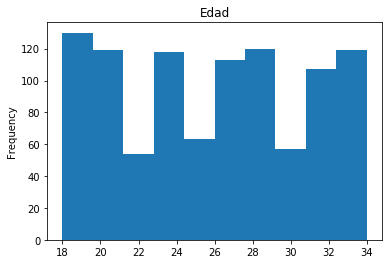

In [7]:
datos['Edad'].plot(kind='hist',title="Edad")

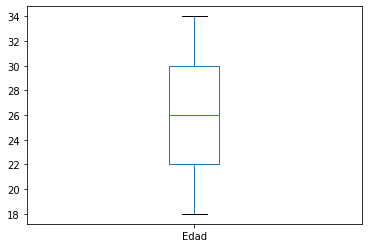

In [8]:
datos['Edad'].plot(kind="box");

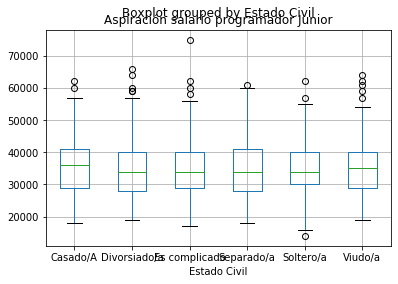

In [9]:
datos.boxplot(column="Aspiración salario programador Junior", by="Estado Civil")

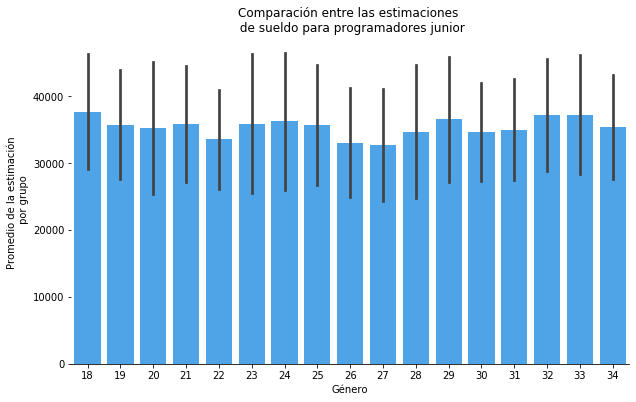

In [10]:
plt.figure(figsize=(10,6))
seaborn.barplot(data=datos, x='Edad',
                y='Aspiración salario programador Junior',
                color=BLUE, ci='sd')
plt.ylabel('Promedio de la estimación \n por grupo')
plt.xlabel('Género')
plt.title('Comparación entre las estimaciones \n de sueldo para programadores junior')
seaborn.despine(left=True)

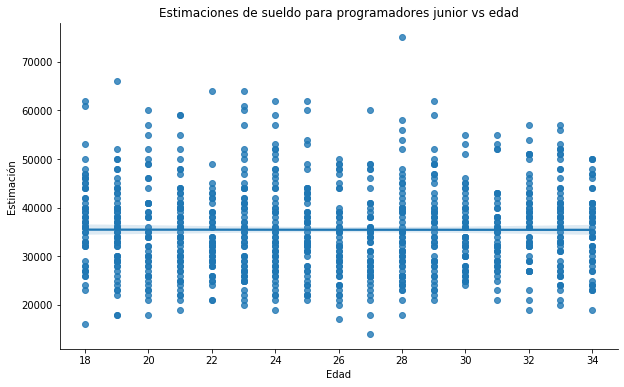

In [11]:
plt.figure(figsize=(10,6))
seaborn.regplot(data=datos, x='Edad',
                y='Aspiración salario programador Junior')
plt.ylabel('Estimación')
plt.xlabel('Edad')
plt.title('Estimaciones de sueldo para programadores junior vs edad')
seaborn.despine()